# Iris Flowers Classification ML Project 

#### Author:TINU MARY RAJAN

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

In [2]:
iris = pd.read_csv('iris.csv')

In [3]:
iris.head()

,SepalLengthcm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.sample(3)

,SepalLengthcm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
66,5.6,3.0,4.5,1.5,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor
6,4.6,3.4,1.4,0.3,Iris-setosa


In [5]:
iris.shape

(150, 5)

In [6]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthcm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Class          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
iris.describe()

,SepalLengthcm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
iris.isnull().sum()

SepalLengthcm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Class            0
dtype: int64

In [9]:
iris.columns

Index(['SepalLengthcm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Class'],
      dtype='object')

# Analysing the data visually

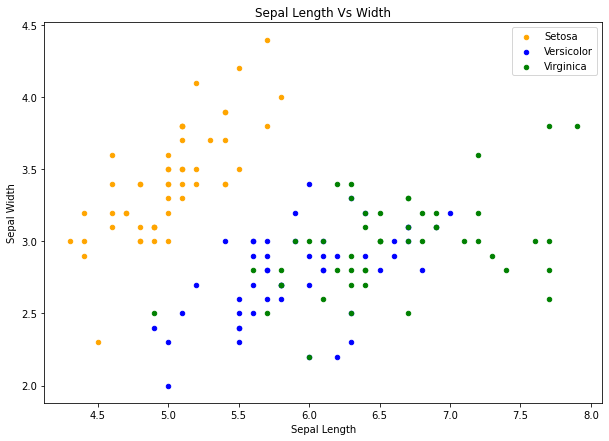

In [10]:
fig = iris[iris.Class == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthcm', y='SepalWidthCm', color='orange', label='Setosa')
iris[iris.Class == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthcm', y='SepalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Class == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthcm', y='SepalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Width')

fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()


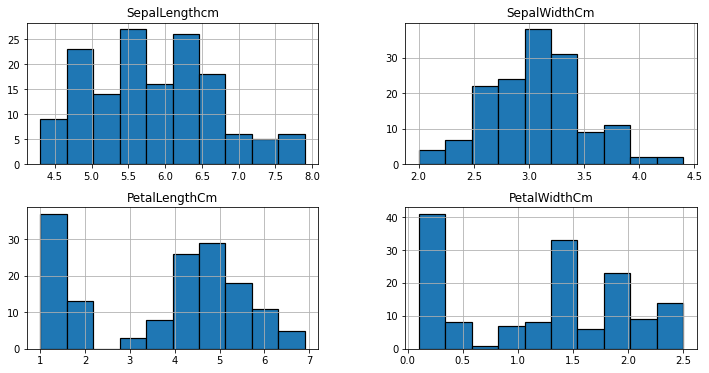

In [11]:
iris.hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

C:\Users\Tinun\anaconda3\lib\site-packages\seaborn\axisgrid.py:2015: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


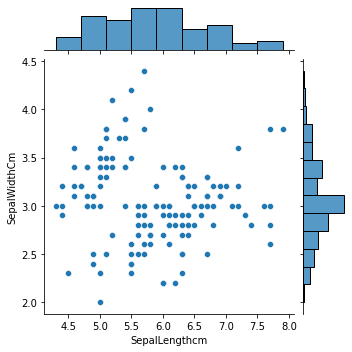

In [12]:
sns.jointplot( data=iris,x="SepalLengthcm", y="SepalWidthCm", size=5)

<AxesSubplot:xlabel='Class', ylabel='PetalWidthCm'>

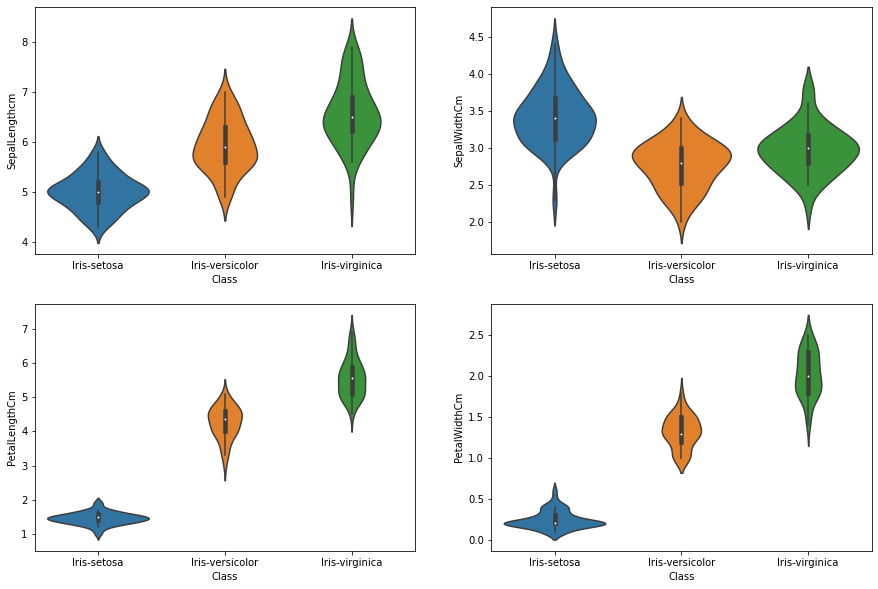

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Class', y = 'SepalLengthcm', data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='Class', y = 'SepalWidthCm', data=iris)

plt.subplot(2,2,3)
sns.violinplot(x='Class', y = 'PetalLengthCm', data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='Class', y = 'PetalWidthCm', data=iris)

C:\Users\Tinun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


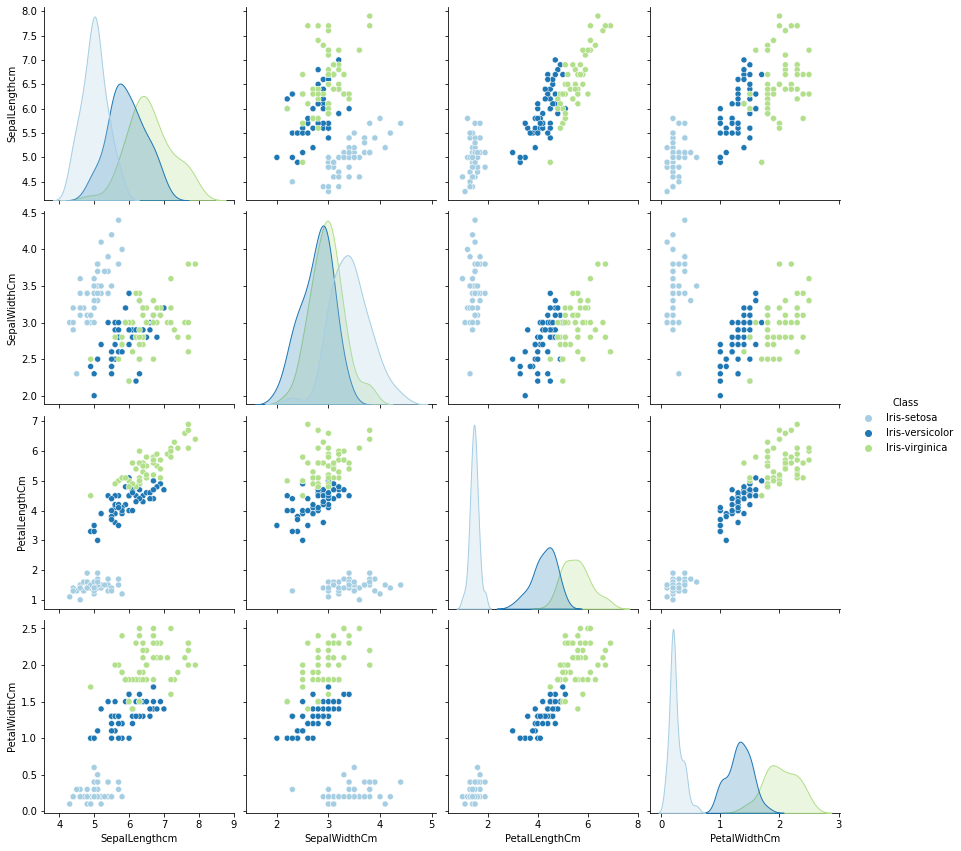

In [14]:
sns.pairplot(iris,hue ="Class",palette= "Paired", size=3)

###### Now the given problem is a classification problem.. Thus we will be using the classification algorithms to build a model.

###### Classification: Samples belong to two or more classes and we want to learn from already labeled data how to predict the class of unlabeled data

<AxesSubplot:>

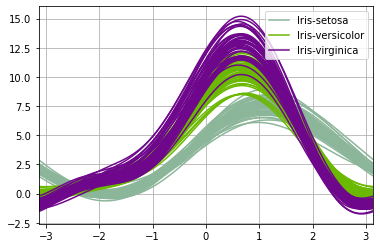

In [15]:
from pandas.plotting import andrews_curves
andrews_curves(iris, "Class")

<AxesSubplot:>

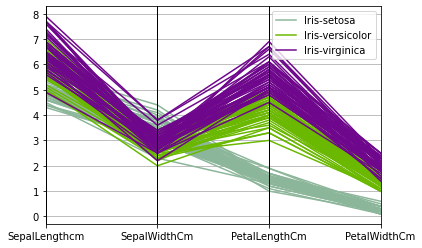

In [16]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.plotting import parallel_coordinates
parallel_coordinates(iris, "Class")

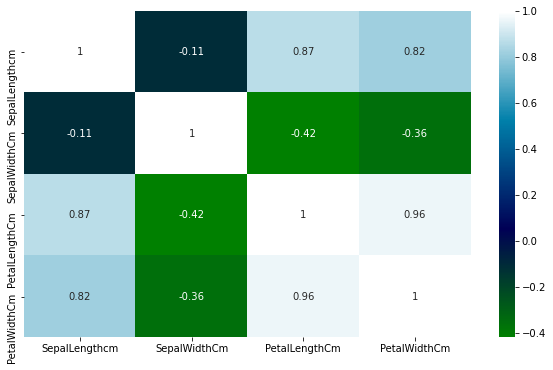

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(iris.corr(), annot=True, cmap='ocean') # draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

###### Insights:The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated We will use all the features for training the algorithm and check the accuracy.Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

###### Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [18]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

In [19]:
train, test = train_test_split(iris, test_size=0.3) # our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [20]:
train_X = train[['SepalLengthcm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
train_y = train.Class # output of the training data

test_X = test[['SepalLengthcm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
test_y = test.Class # output value of the test data

In [21]:
train_y.head()

61     Iris-versicolor
24         Iris-setosa
18         Iris-setosa
32         Iris-setosa
140     Iris-virginica
Name: Class, dtype: object

# Support Vector Machine SVM

In [22]:
model1 = svm.SVC() # select the svm algorithm

# we train the algorithm with training data and training output
model1.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome
prediction = model1.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score( test_y,prediction)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is:  0.9777777777777777


###### SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

# Decision Tree

In [23]:
model3 = DecisionTreeClassifier()
model3.fit(train_X, train_y)
prediction = model3.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score( test_y,prediction))

The accuracy of Decision Tree is:  0.9555555555555556


# K-Nearest Neighbors


In [24]:
model4 = KNeighborsClassifier(n_neighbors=5) # this examines 5 neighbors for putting the data into class
model4.fit(train_X, train_y)
prediction = model4.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score( test_y,prediction))

The accuracy of KNN is:  0.9777777777777777


# AdaBoostClassifier

In [25]:
from sklearn.ensemble import AdaBoostClassifier
model5=AdaBoostClassifier()
model5.fit(train_X,train_y)
prediction=model5.predict(test_X)
print('The accuracy of  AdaBoostClassifier is: ', metrics.accuracy_score(test_y,prediction))

The accuracy of  AdaBoostClassifier is:  0.9333333333333333


In [26]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[12,  0,  0],
       [ 0, 14,  0],
       [ 0,  3, 16]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print("Classification Report is:\n",classification_report(test_y,prediction))

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.84      0.91        19

       accuracy                           0.93        45
      macro avg       0.94      0.95      0.94        45
   weighted avg       0.95      0.93      0.93        45



# RandomForestClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier
model8=RandomForestClassifier()
model8.fit(train_X,train_y)
prediction=model8.predict(test_X)
print('The accuracy of  RandomForestClassifier is: ', metrics.accuracy_score( test_y,prediction))

The accuracy of  RandomForestClassifier is:  0.9777777777777777


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 19]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print("Classification Report is:\n",classification_report(test_y,prediction))

Classification Report is:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



# Naive Bayes

In [31]:
from sklearn.naive_bayes import GaussianNB
model9 = GaussianNB()
model9.fit(train_X, train_y)

y_pred = model9.predict(test_X)

# Summary of the predictions made by the classifier
print(classification_report(test_y, prediction))
print(confusion_matrix(test_y, prediction))
# Accuracy score
from sklearn.metrics import accuracy_score
print('The accuracy of Naive Bayes is: ', metrics.accuracy_score( test_y,prediction))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       1.00      0.93      0.96        14
 Iris-virginica       0.95      1.00      0.97        19

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

[[12  0  0]
 [ 0 13  1]
 [ 0  0 19]]
The accuracy of Naive Bayes is:  0.9777777777777777


Conclusion : We got a good accuracy score of about 97.7% using KNN,Naive Bayes and Random Classifier